Se busca predecir el numero correcto de bicicletas rentadas **cnt** lo que deriba en un problema de regresión.

In [13]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [4]:
%ls

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: D402-4481

 Directorio de C:\Users\GAMER\Documents\Development\Python\notebook\k fold cv

05/01/2022  08:56 p. m.    <DIR>          .
05/01/2022  08:56 p. m.    <DIR>          ..
05/01/2022  08:52 p. m.    <DIR>          .ipynb_checkpoints
05/01/2022  08:50 p. m.            52.255 bike_rentals.csv
05/01/2022  08:56 p. m.             1.498 Untitled.ipynb
               2 archivos         53.753 bytes
               3 dirs  65.086.840.832 bytes libres


In [7]:
df = pd.read_csv('./bike_rentals.csv')
df.head(5)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1.0,0.0,1.0,0.0,6.0,0.0,2,0.344167,0.363625,0.805833,0.160446,985
1,2,1.0,0.0,1.0,0.0,0.0,0.0,2,0.363478,0.353739,0.696087,0.248539,801
2,3,1.0,0.0,1.0,0.0,1.0,1.0,1,0.196364,0.189405,0.437273,0.248309,1349
3,4,1.0,0.0,1.0,0.0,2.0,1.0,1,0.200000,0.212122,0.590435,0.160296,1562
4,5,1.0,0.0,1.0,0.0,3.0,1.0,1,0.226957,0.229270,0.436957,0.186900,1600


In [8]:
df.cnt.describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

<AxesSubplot:>

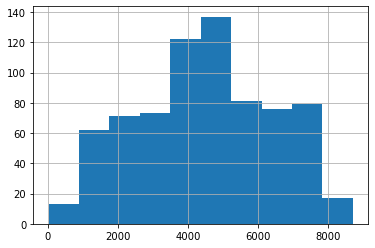

In [11]:
df.cnt.hist()

## El modelo mas sencillo

In [14]:
X = df.drop(['cnt'],axis=1)
y = df['cnt']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mse)
print(rmse)

824.3257394966786


## Validar el modelo con diferentes datos k particiones

In [15]:
# DESORDENAR LOS DATOS
from sklearn.utils import shuffle

from sklearn.model_selection import cross_val_score

X_shuffle,y_shuffle = shuffle(X,y,random_state=42)

scores = cross_val_score(model,X_shuffle,y_shuffle,
                        scoring="neg_mean_squared_error",
                        cv=5,n_jobs=1)

rmse = np.sqrt(-scores)
print("RMSE values: ", np.round(rmse, 2))
print("RMSE average: ", np.mean(rmse))

RMSE values:  [824.33 955.56 841.34 932.75 863.13]
RMSE average:  883.4197051998126


## Configurar Hiperparametros
### Grid Search y K-fold cv

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(n_estimators=100,criterion='mse',
                             bootstrap=True,oob_score=True,n_jobs=2,
                             random_state=42)

hyperparameter_space = {'max_depth':[None,4,6,8,10,12,15,20],
                       'min_samples_leaf':[1,2,4,6,8,10,20,30],
                       'max_features':['auto','sqrt','log2']}



gs = GridSearchCV(model,param_grid=hyperparameter_space,
                 scoring="neg_mean_squared_error",
                 n_jobs=-1, cv=5, return_train_score=True)

gs.fit(X_train, y_train)

gs.fit(X_train, y_train)
print("Optimal hyperparameter combination: ", gs.best_params_)
print("Mean cross-validated MSE or training score of the best_estimator: ",
       np.sqrt(-gs.best_score_))

Optimal hyperparameter combination:  {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1}
Mean cross-validated MSE or training score of the best_estimator:  659.4814164563437


In [21]:
gs.best_estimator_.fit(X_train, y_train)
y_pred = gs.best_estimator_.predict(X_test)

In [23]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test score: ", np.round(rmse_test, 2))

Test score:  661.72
